In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib. pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Data analysis

In [12]:
df = pd.read_csv('Source.csv')
len(df)

50000

In [13]:
df.dtypes

Age                 float64
Car_value           float64
Rate                float64
Cost                float64
Mileage             float64
Credit_Score        float64
License_duration    float64
Sarting_date         object
Marital_info         object
Payment              object
Veh_Reg_Year        float64
Purchased             int64
dtype: object

In [14]:
df.head(3)

,Age,Car_value,Rate,Cost,Mileage,Credit_Score,License_duration,Sarting_date,Marital_info,Payment,Veh_Reg_Year,Purchased
0,68.234601,4385.559975,10.726928,395.881843,7299.380077,366.105677,8.711803,2016-05-14,M,Installments,2017.0,0
1,32.066145,6246.182948,7.869344,534.441400,5887.218868,306.560408,8.754815,2016-06-30,S,Cash,2015.0,0
2,52.039464,5753.093177,9.112318,472.386504,6327.126420,430.070380,6.942515,2016-10-02,M,Installments,2014.0,0


In [15]:
df.describe()

,Age,Car_value,Rate,Cost,Mileage,Credit_Score,License_duration,Veh_Reg_Year,Purchased
count,49517.000000,49475.000000,49483.000000,49485.000000,49491.000000,49503.000000,49502.000000,49512.000000,50000.000000
mean,40.513323,6008.619286,10.995845,540.394322,6996.676853,496.283494,7.998617,2013.000909,0.697980
std,13.437293,988.892325,1.063099,135.680353,1327.923420,963.166654,1.994698,2.466044,0.459138
min,18.000000,1837.647794,4.727910,22.949392,1406.334168,55.887237,-0.346291,2008.000000,0.000000
25%,30.452442,5340.690362,10.333460,444.975639,6106.976176,346.341080,6.643690,2012.000000,0.000000
50%,40.303268,6005.285092,11.001785,549.330866,6998.198119,400.250070,8.007871,2013.000000,1.000000
75%,49.869251,6676.189181,11.661439,638.323917,7888.930249,455.046589,9.342741,2015.000000,1.000000
max,93.559448,10047.187780,16.244017,994.190554,12795.519718,9999.000000,16.403324,2017.000000,1.000000


In [16]:
print ('NaN percentage:', df.isna().sum().sum()/len(df) * 100,'%')
print ('Duplicate percentage:', df.duplicated().sum().sum()/len(df) * 100,'%')

NaN percentage: 10.992 %
Duplicate percentage: 0.0 %


In [17]:
df.isna().sum()

Age                 483
Car_value           525
Rate                517
Cost                515
Mileage             509
Credit_Score        497
License_duration    498
Sarting_date        497
Marital_info        483
Payment             484
Veh_Reg_Year        488
Purchased             0
dtype: int64

In [18]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44820 entries, 0 to 49999
Data columns (total 12 columns):
Age                 44820 non-null float64
Car_value           44820 non-null float64
Rate                44820 non-null float64
Cost                44820 non-null float64
Mileage             44820 non-null float64
Credit_Score        44820 non-null float64
License_duration    44820 non-null float64
Sarting_date        44820 non-null object
Marital_info        44820 non-null object
Payment             44820 non-null object
Veh_Reg_Year        44820 non-null float64
Purchased           44820 non-null int64
dtypes: float64(8), int64(1), object(3)
memory usage: 4.4+ MB


In [20]:
df['Date'] = pd.to_datetime(df['Sarting_date'], format = '%Y-%m-%dT')

In [21]:
df['Day'] = df['Date'].dt.day
df['Month'] =  df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [22]:
df = df.drop(['Date', 'Year'], axis=1)

# Data visualisation

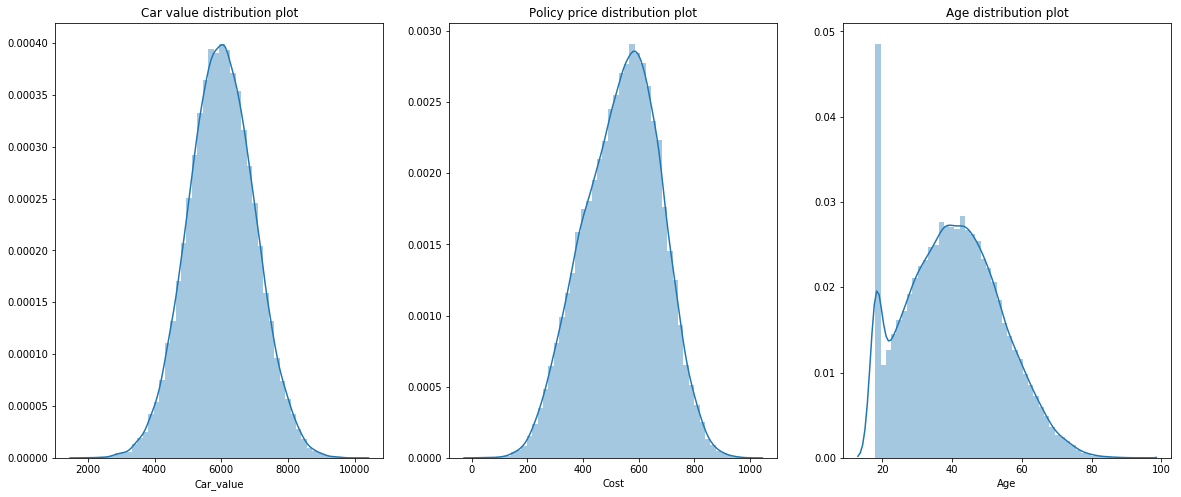

In [27]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.title('Car value distribution plot')
sns.distplot(df.Car_value)

plt.subplot(1,3,2)
plt.title('Policy price distribution plot')
sns.distplot(df.Cost)

plt.subplot(1,3,3)
plt.title('Age distribution plot')
sns.distplot(df.Age)

plt.show()

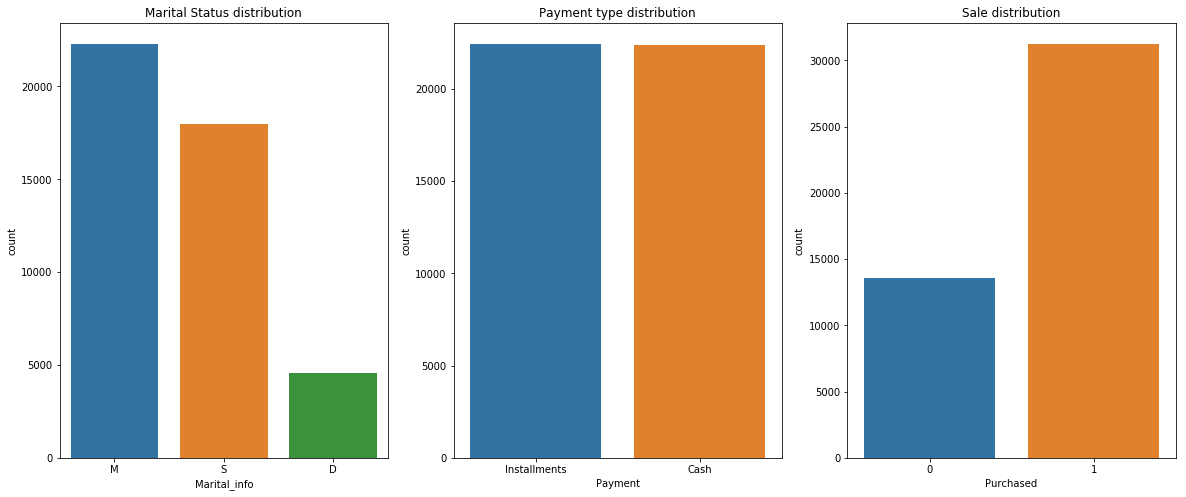

In [28]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.title('Marital Status distribution')
sns.countplot(x = df.Marital_info)

plt.subplot(1,3,2)
plt.title('Payment type distribution')
sns.countplot(x = df.Payment)

plt.subplot(1,3,3)
plt.title('Sale distribution')
sns.countplot(x = df.Purchased)

plt.show()

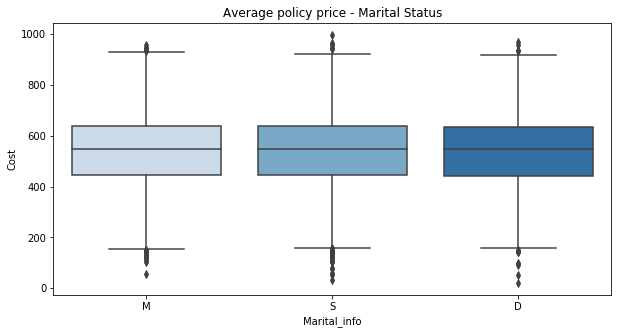

In [29]:
plt.figure(figsize=(10,5))

plt.title('Average policy price - Marital Status')
sns.boxplot(x = df.Marital_info, y = df.Cost, palette=("Blues"))

plt.show()

<Figure size 1800x432 with 0 Axes>

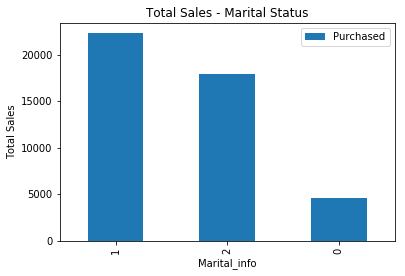

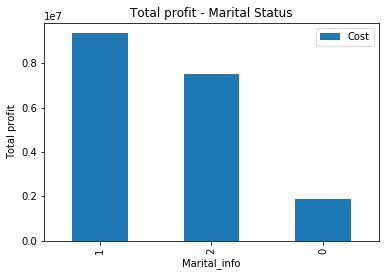

In [86]:
plt.figure(figsize=(25, 6))

dfzz = round(pd.DataFrame(df.groupby(['Marital_info'])['Purchased'].count().sort_values(ascending = False))).plot.bar()
dfzz.plot(kind='bar')
plt.title('Total Sales - Marital Status')
plt.ylabel('Total Sales')
plt.show()

df1 = df.loc[df['Purchased'] == 1]
dfzz = round(pd.DataFrame(df1.groupby(['Marital_info'])['Cost'].sum().sort_values(ascending = False))).plot.bar()
dfzz.plot(kind='bar')
plt.title('Total profit - Marital Status')
plt.ylabel('Total profit')
plt.show()

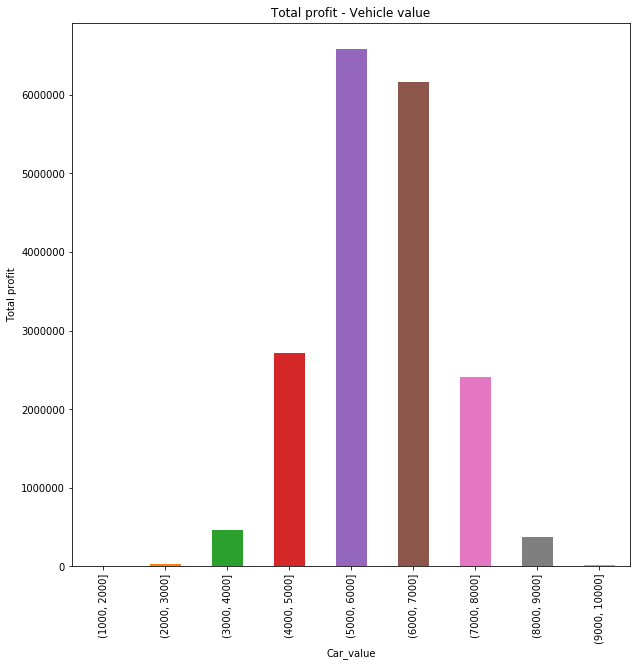

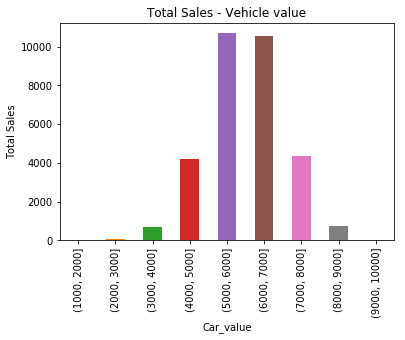

In [33]:
plt.figure(figsize=(10, 10))

df1 = df.loc[df['Purchased'] == 1]
dfz = round(df1.groupby(pd.cut(df1['Car_value'], np.arange(1000, 11000, 1000)))['Cost'].sum())
dfz.plot(kind='bar')
plt.title('Total profit - Vehicle value')
plt.ylabel('Total profit')
plt.show()


dfz = round(df.groupby(pd.cut(df['Car_value'], np.arange(1000, 11000, 1000)))['Purchased'].sum())
dfz.plot(kind='bar')
plt.title('Total Sales - Vehicle value')
plt.ylabel('Total Sales')
plt.show()

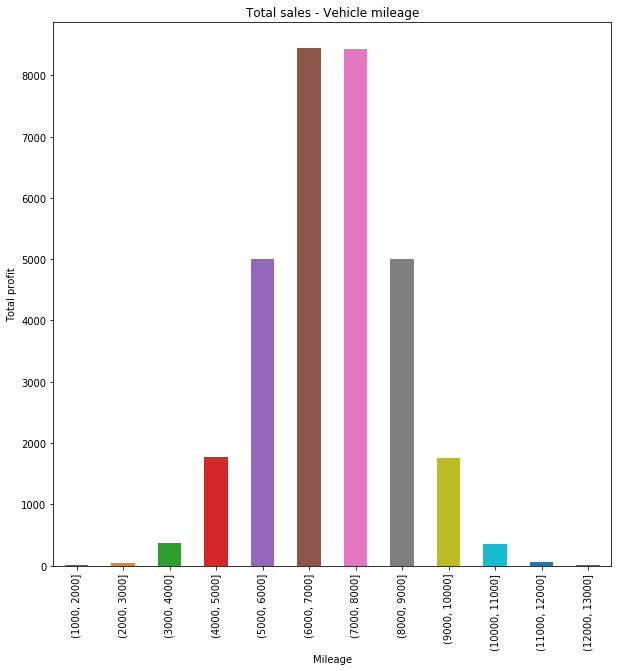

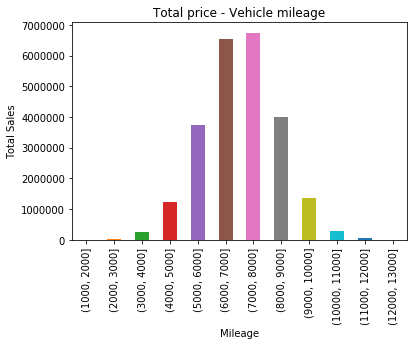

In [35]:
plt.figure(figsize=(10, 10))


dfzz = round(df1.groupby(pd.cut(df1['Mileage'], np.arange(1000, 14000, 1000)))['Purchased'].sum())
dfzz.plot(kind='bar')
plt.title('Total sales - Vehicle mileage')
plt.ylabel('Total profit')
plt.show()


df1 = df.loc[df['Purchased'] == 1]
dfzz = round(df.groupby(pd.cut(df['Mileage'], np.arange(1000, 14000, 1000)))['Cost'].sum())
dfzz.plot(kind='bar')
plt.title('Total price - Vehicle mileage')
plt.ylabel('Total Sales')
plt.show()

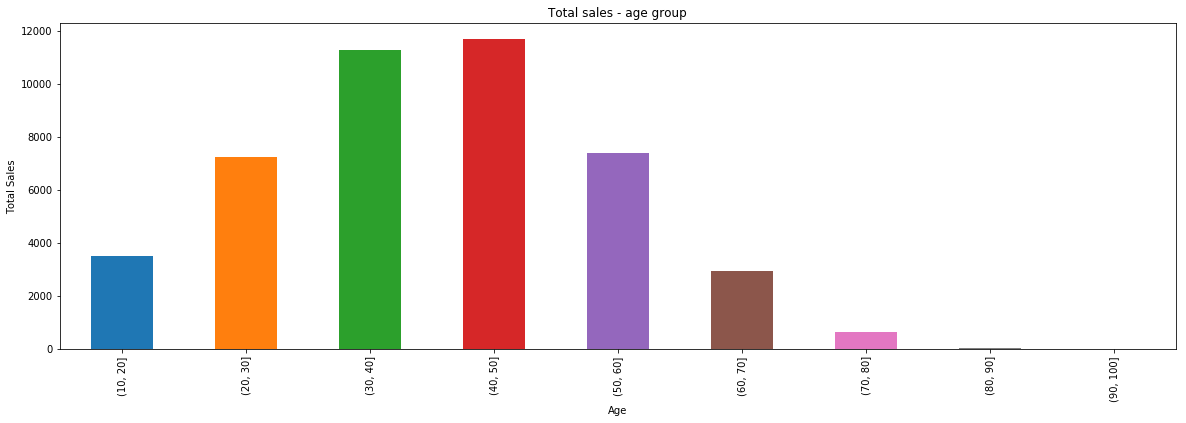

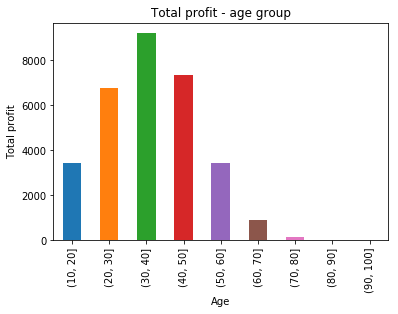

In [36]:
plt.figure(figsize=(20, 6))

dfz = df.groupby(pd.cut(df['Age'], np.arange(10, 110, 10)))['Purchased'].count()
dfz.plot(kind='bar')
plt.title('Total sales - age group')
plt.ylabel('Total Sales')
plt.show()
            
df1 = df.loc[df['Purchased'] == 1]
dfzz = df1.groupby(pd.cut(df1['Age'], np.arange(10, 110, 10)))['Cost'].count()
dfzz.plot(kind='bar')
plt.title('Total profit - age group')
plt.ylabel('Total profit')
plt.show()

# Feature correlation

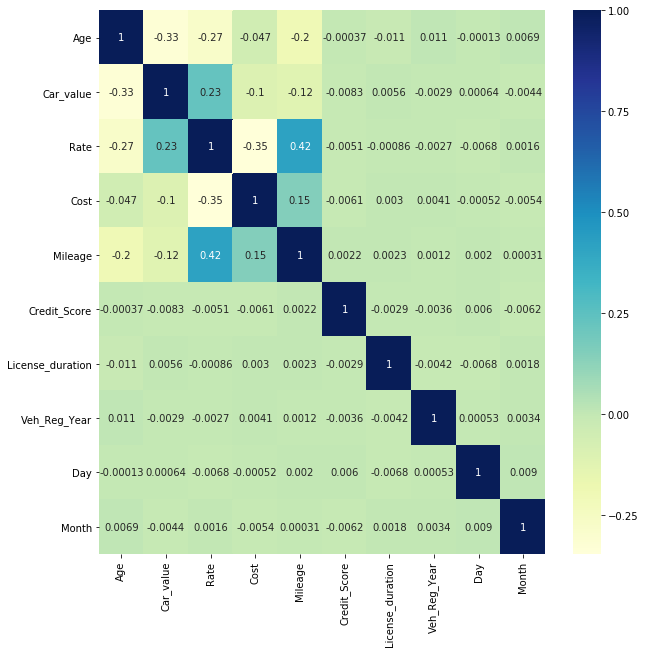

In [38]:
plt.figure(figsize = (10,10))
sns.heatmap(df.drop(['Purchased'], axis = 1).corr(), annot = True, cmap="YlGnBu")

plt.show()

# Process categorical features

In [40]:
X = df.drop(['Purchased'], axis=1)
y = df.Purchased

In [41]:
df.dtypes

Age                 float64
Car_value           float64
Rate                float64
Cost                float64
Mileage             float64
Credit_Score        float64
License_duration    float64
Sarting_date         object
Marital_info         object
Payment              object
Veh_Reg_Year        float64
Purchased             int64
Day                   int64
Month                 int64
dtype: object

In [42]:
categorical_feature_mask = X.dtypes==object
categorical_cols = X.columns[categorical_feature_mask].tolist()

In [43]:
le = LabelEncoder()

In [44]:
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))

In [45]:
ohe = OneHotEncoder(categorical_features = categorical_feature_mask, sparse=False ) 
X_ohe = ohe.fit_transform(X)

C:\Users\Giorgos\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


# Feature importance

In [46]:
seed = 45

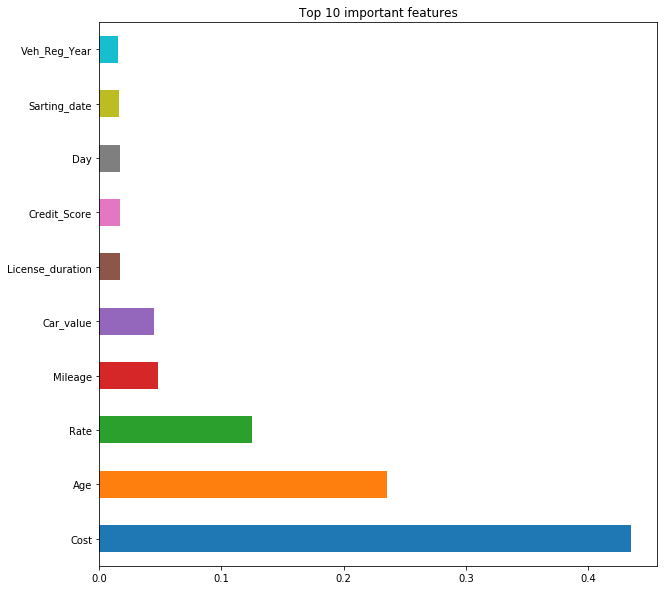

In [47]:
model = ExtraTreesClassifier(n_estimators = 100, random_state = seed)
model.fit(X, y)

feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(figsize=(10,10), kind='barh')
plt.title('Top 10 important features')

plt.show()

# Models

## Evaluation metrics 

In [48]:
def plot_roc_auc(y_test, y_pred):
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    
    plt.show()

In [49]:
def binary_classification_performance(y_test, y_pred, model):
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * precision * recall / (precision + recall) 
    auc_roc = round(roc_auc_score(y_score = y_pred, y_true = y_test),2)
    model_name = model
    result = pd.DataFrame({
                         'Model' : [model_name],
                         'Precision' : [precision],
                         'Recall': [recall],
                         'f1 score' : [f1_score],
                         'AUC_ROC' : [auc_roc],
                         'True Positive' : [tp],
                         'True Negative' : [tn],
                         'False Positive':[fp],
                         'False Negative':[fn]
                        })
    
    return result

## Data splits 

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.3, random_state=seed)

In [51]:
print (len(X_train), len(X_test), len(y_train), len(y_test))

31374 13446 31374 13446


# XGboost Classfier

In [52]:
xgb_cl = xgb.XGBClassifier(random_state = seed)

In [53]:
xgb_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=45, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [54]:
y_pred = xgb_cl.predict(X_test)

In [55]:
xgb_df = binary_classification_performance(y_test, y_pred, 'XGBclassifier')
binary_classification_performance(y_test, y_pred, 'XGBclassifier')

,Model,Precision,Recall,f1 score,AUC_ROC,True Positive,True Negative,False Positive,False Negative
0,XGBclassifier,0.985586,0.990557,0.988065,0.98,9231,3992,135,88


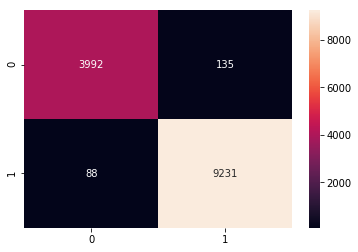

In [56]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.show()

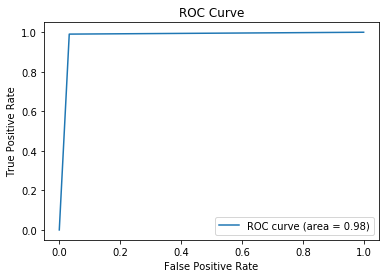

In [57]:
plot_roc_auc(y_test, y_pred)

# Logistic regression

In [58]:
LogReg = LogisticRegression(random_state = seed)

In [59]:
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=45, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
y_pred = LogReg.predict(X_test)

In [61]:
logreg_df = binary_classification_performance(y_test, y_pred, 'Logistic regression')
logreg_df

,Model,Precision,Recall,f1 score,AUC_ROC,True Positive,True Negative,False Positive,False Negative
0,Logistic regression,0.982744,0.983904,0.983324,0.97,9169,3966,161,150


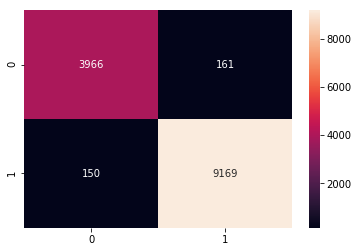

In [62]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.show()

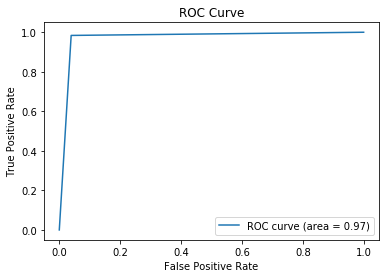

In [63]:
plot_roc_auc(y_test, y_pred)

# Decision Tree Classifier

In [64]:
dtc = DecisionTreeClassifier(random_state = seed)

In [65]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=45,
            splitter='best')

In [66]:
y_pred = dtc.predict(X_test)

In [67]:
dtc_df = binary_classification_performance(y_test, y_pred, 'Decision Tree Classifier')
dtc_df

,Model,Precision,Recall,f1 score,AUC_ROC,True Positive,True Negative,False Positive,False Negative
0,Decision Tree Classifier,0.975466,0.977036,0.97625,0.96,9105,3898,229,214


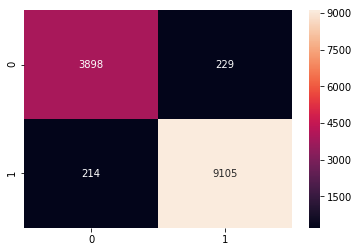

In [68]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.show()

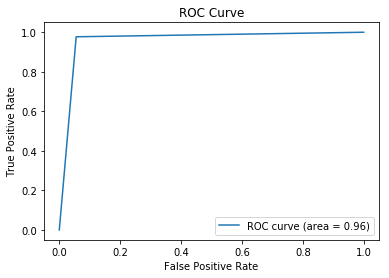

In [69]:
plot_roc_auc(y_test, y_pred)

# Models comparison

In [70]:
models = (xgb_df, logreg_df, dtc_df)

In [71]:
model_eval = pd.concat(models)

In [72]:
model_eval.sort_values('f1 score', ascending = False)

,Model,Precision,Recall,f1 score,AUC_ROC,True Positive,True Negative,False Positive,False Negative
0,XGBclassifier,0.985586,0.990557,0.988065,0.98,9231,3992,135,88
0,Logistic regression,0.982744,0.983904,0.983324,0.97,9169,3966,161,150
0,Decision Tree Classifier,0.975466,0.977036,0.976250,0.96,9105,3898,229,214
